In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
sb.set()

In [176]:
data = pd.read_csv('categorical.csv')
data = data.drop("Attrition", axis=1)
resp = pd.read_csv("data.csv",usecols = ['Attrition'])


In [177]:
data.head()


,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,Travel_Rarely,Sales,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,Yes,3,1,0,1
1,Travel_Frequently,Research & Development,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,No,4,4,1,3
2,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,3,Single,Yes,3,2,0,3
3,Travel_Frequently,Research & Development,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,Yes,3,3,0,3
4,Travel_Rarely,Research & Development,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,No,3,4,1,3


In [178]:
resp.head()

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No


In [179]:
data = pd.get_dummies(data)

In [180]:
data.head()


,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,BusinessTravel_Non-Travel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,2,2,3,2,4,3,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1,1,3,2,2,2,4,4,1,3,0,...,0,0,1,0,0,0,1,0,1,0
2,2,4,2,1,3,3,2,0,3,0,...,0,0,0,0,0,0,0,1,0,1
3,4,4,3,1,3,3,3,0,3,0,...,0,0,1,0,0,0,1,0,0,1
4,1,1,3,1,2,3,4,1,3,0,...,0,0,0,0,0,0,1,0,1,0


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Education                          1470 non-null   int64
 1   EnvironmentSatisfaction            1470 non-null   int64
 2   JobInvolvement                     1470 non-null   int64
 3   JobLevel                           1470 non-null   int64
 4   JobSatisfaction                    1470 non-null   int64
 5   PerformanceRating                  1470 non-null   int64
 6   RelationshipSatisfaction           1470 non-null   int64
 7   StockOptionLevel                   1470 non-null   int64
 8   WorkLifeBalance                    1470 non-null   int64
 9   BusinessTravel_Non-Travel          1470 non-null   uint8
 10  BusinessTravel_Travel_Frequently   1470 non-null   uint8
 11  BusinessTravel_Travel_Rarely       1470 non-null   uint8
 12  Department_Human Res

In [186]:
from imblearn.over_sampling import SMOTE 
resp['attrition_binary'] = resp["Attrition"].apply(lambda x: 1 if x == 'Yes' else 0)
LogReg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(data, resp['attrition_binary'], test_size=0.25, random_state=42)
oversampler= SMOTE(random_state=0)
x_train, y_train = oversampler.fit_resample(x_train,y_train)
LogReg.fit(x_train, y_train)
train_acc = LogReg.score(x_train, y_train)
test_acc = LogReg.score(x_test, y_test)
print("Accuracy on Train set:", train_acc)
print("Accuracy on Test set:", test_acc)

Accuracy on Train set: 0.9096385542168675
Accuracy on Test set: 0.8614130434782609


c:\Users\yingh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [187]:
# Get the coefficients of the logistic regression model
coefficients = LogReg.coef_[0]

# Get the absolute values of the coefficients
absolute_coefficients = abs(coefficients)

# Rank the variables based on their importance
variable_importance = sorted(zip(absolute_coefficients, data.columns), reverse=True)

# Print the variable importance rankings
print("Variable Importance Rankings:")
for i, (coef, name) in enumerate(variable_importance):
    print("{}. {} ({:.4f})".format(i+1, name, coef))

Variable Importance Rankings:
1. OverTime_No (2.5787)
2. BusinessTravel_Non-Travel (2.4496)
3. EducationField_Other (2.3835)
4. EducationField_Life Sciences (2.3715)
5. Gender_Female (2.3200)
6. EducationField_Medical (2.3015)
7. MaritalStatus_Divorced (2.1797)
8. JobRole_Healthcare Representative (2.1426)
9. EducationField_Marketing (2.1186)
10. Gender_Male (1.9766)
11. JobRole_Research Director (1.9619)
12. JobRole_Manufacturing Director (1.8772)
13. MaritalStatus_Married (1.7936)
14. JobRole_Research Scientist (1.6791)
15. EducationField_Technical Degree (1.6248)
16. JobRole_Manager (1.4751)
17. Department_Human Resources (1.4028)
18. BusinessTravel_Travel_Rarely (1.3971)
19. JobRole_Sales Executive (1.1703)
20. Department_Research & Development (1.0960)
21. JobRole_Human Resources (0.9836)
22. BusinessTravel_Travel_Frequently (0.9525)
23. Department_Sales (0.9457)
24. EducationField_Human Resources (0.9319)
25. OverTime_Yes (0.8890)
26. MaritalStatus_Single (0.8017)
27. JobRole_Lab

From this we can infer that overtime, businessTravel are important factors in determining attrition

<AxesSubplot:xlabel='BusinessTravel_Non-Travel', ylabel='attrition_binary'>

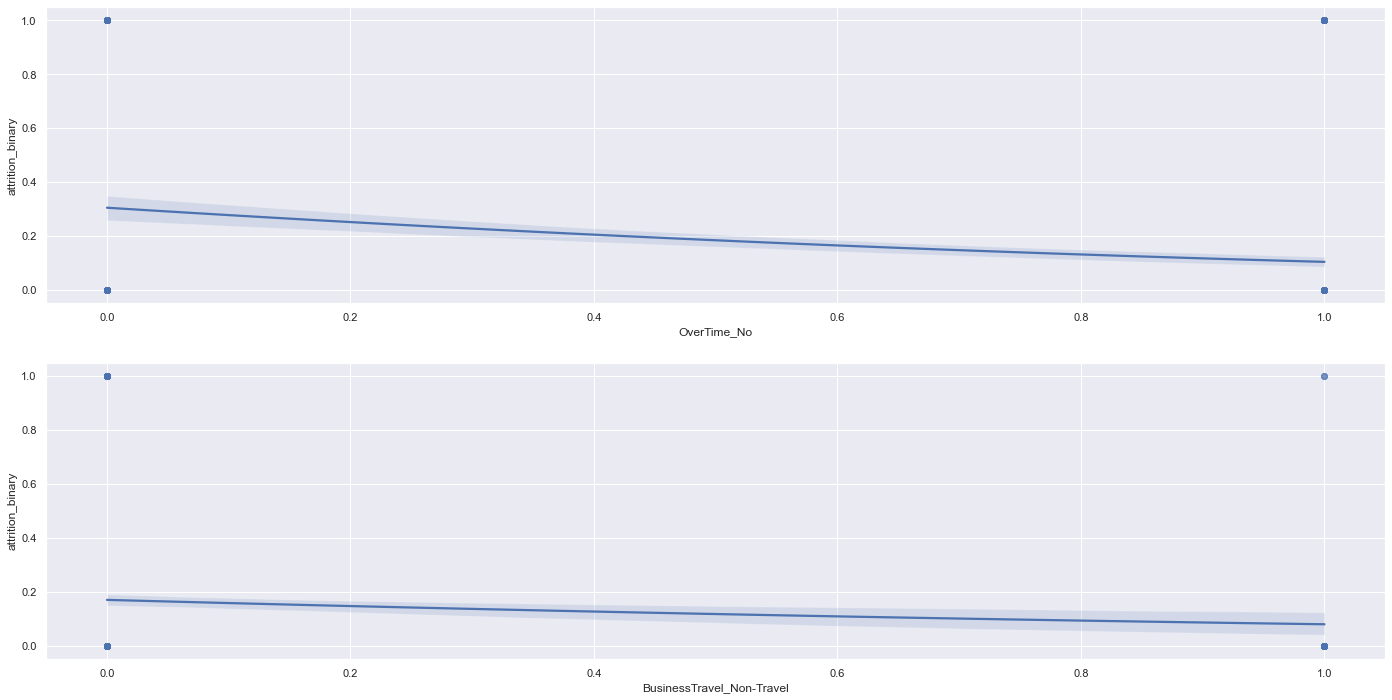

In [189]:
resp['attrition_binary'] = resp["Attrition"].apply(lambda x: 1 if x == 'Yes' else 0)
X = data[['OverTime_No','BusinessTravel_Non-Travel']]
y = resp['attrition_binary']
model = LogisticRegression().fit(X, y)

# Create a plot of the logistic regression curve
f, axes = plt.subplots(2, 1, figsize=(24, 12))
sb.regplot(x=X['OverTime_No'], y=y, logistic=True, scatter_kws={'alpha':0.1}, ax=axes[0])
sb.regplot(x=X['BusinessTravel_Non-Travel'], y=y, logistic=True, scatter_kws={'alpha':0.1}, ax=axes[1])
